All required imports

In [18]:
import numpy as np
import matplotlib as plt
import sklearn
import os
import pandas as pd
import keras

This loads data into pandas dataframes

In [19]:
try:
    root
except:
    root = os.getcwd()

data_path = os.path.join(root, "../skin-cancer-mnist-ham10000")

# the associated meta data
metadata = pd.read_csv(os.path.join(data_path, "HAM10000_metadata.csv"))

# the pixels RGB
X_pixels = pd.read_csv(os.path.join(data_path, "hmnist_28_28_RGB.csv"))

In [20]:
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [21]:
print(X_pixels.shape)
X_pixels.drop(['label'], axis=1,inplace = True)
X_pixels.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Reformat metadata into X_metadata, categorical variables turned into one hot encoding, non-features removed.
Also make variable y into the classifications

In [22]:
X_metadata = metadata.loc[:, ['dx_type', 'age', 'sex', 'localization']]
X_metadata = pd.get_dummies(data=X_metadata, columns=['dx_type', 'sex', 'localization'])
X_metadata.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,75.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = metadata.loc[:, 'dx']
y = pd.get_dummies(data=y, columns=['dx'])
y.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


Simply make X be the concatenation of X_pixels and X_metadata

In [24]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


In [25]:
import matplotlib.pyplot as plt
def scaleNVDown(metadata, scale_down):
    if scale_down:        
        only_nv = metadata.loc[metadata['dx'] == 'nv']
        rand_samp = np.random.choice(only_nv.index, size = 5500, replace = False)
        down_scale = metadata.drop(list(rand_samp), axis=0)

        graph = down_scale['dx'].value_counts().plot.bar() 
        graph.set_title("Data after scaling down nv", fontweight="bold")
        graph.set_xlabel("Labels", fontweight="bold")
        graph.set_ylabel("Count", fontweight="bold")
        plt.show()
        return down_scale
    else:
        return metadata

def removeLabels(metadata, remove_labels):
    if remove_labels:
        remove = metadata.loc[metadata['dx'].isin(['df', 'akiec', 'bcc', 'vasc'])]
        cleaned_dat = metadata.drop(remove.index, axis=0)
        
        graph = cleaned_dat['dx'].value_counts().plot.bar() 
        graph.set_title("Data after removing df, akiec, bcc, and vasc labels", fontweight="bold")
        graph.set_xlabel("Labels", fontweight="bold")
        graph.set_ylabel("Count", fontweight="bold")
        plt.show()
        return cleaned_dat, cleaned_dat['dx'].unique()
    else:
        return metadata, metadata['dx'].unique()

def pre_process(metadata, proportion, random_seed):    
    # convert strings to unique ints
    from sklearn import preprocessing as pp
    from sklearn.model_selection import train_test_split
    
    # Convert strings to unique ints to pass into classifier
    le = pp.LabelEncoder()
    metadata['dx_type'].iloc[:] = le.fit_transform(metadata['dx_type']).astype(np.float64)
    metadata['sex'].iloc[:] = le.fit_transform(metadata['sex']).astype(np.float64)
    metadata['localization'].iloc[:] = le.fit_transform(metadata['localization']).astype(np.float64)
    
    # Separate data into segments
    data = metadata['dx']
    bar_plot = data.value_counts()
    ids = metadata[['lesion_id', 'image_id']]
    features = metadata.drop(['lesion_id', 'image_id', 'dx'], axis=1)
    
    train_features, test_features, train_label, test_label = train_test_split(features, data, test_size=proportion, random_state=random_seed)
    
    return test_label.fillna(-1.0), test_features.fillna(-1.0), train_label.fillna(-1.0), train_features.fillna(-1.0)
  
def stat_graphs(test_label, label_pred, labels):
    from sklearn.metrics import classification_report, confusion_matrix
    pred_df = pd.DataFrame()
    pred_df["y_true"] = test_label
    pred_df["y_pred"] = label_pred
    pred_df.reset_index(inplace = True, drop = True)
    pred_df.to_csv("../Figures/prat_classifications.csv")
    
    conf_matrix = confusion_matrix(test_label, label_pred)
    print('\nClassification Report')
    classification_report = classification_report(test_label, label_pred, target_names=labels) 
    print(classification_report)
    num_right = np.sum(test_label == label_pred)
    print(f"Accuracy {num_right / test_label.shape[0]} \n")
    
    return conf_matrix
    

def randomforest(metadata, size_of_test_data, random_seed, remove_labels, scale_down_NV):
    from sklearn.ensemble import RandomForestClassifier as RFC
    
    graph = metadata['dx'].value_counts().plot.bar()
    graph.set_title("Original Data", fontweight="bold")
    graph.set_xlabel("Labels", fontweight="bold")
    graph.set_ylabel("Count", fontweight="bold")
    plt.show()
    
    # Process data and get the training and testing set
    metadata_v2 = scaleNVDown(metadata, scale_down_NV)
    metadata_v3, target = removeLabels(metadata_v2, remove_labels)
    test_label ,test_features ,train_label ,train_features = pre_process(metadata_v3, size_of_test_data, random_seed)
    
    # Run the model training and prediction
    rfc = RFC()
    rfc.fit(train_features, train_label)
    label_pred = rfc.predict(test_features)

    # Plot the confusion matrix, store classification report, and store pred/true labels
    conf_matrix = stat_graphs(test_label, label_pred, target)
    return target, conf_matrix


def plot_conf_matrix(conf_matrix, labels, directory):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sn
    import pandas as pd
    import seaborn as sns
    import math
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib as mpl

    plt.style.use('seaborn')
    conf_arr = conf_matrix

    s = conf_arr.sum(axis = 1)
    conf_arr = (conf_arr * 100.0) / s[:,None]
    conf_arr = np.nan_to_num(conf_arr)
    df_cm = pd.DataFrame(conf_arr, 
      index = labels,
      columns = labels)
    
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

    plt.yticks(np.arange(len(labels)) + .5, labels,va='center')
    plt.title('Confusion Matrix')
    plt.xlabel("Prediction")
    plt.ylabel("Class")
    plt.savefig(directory, dpi=100, bbox_inches='tight' )
    plt.show()
    plt.close()

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn import preprocessing as pp
# from sklearn import datasets, linear_model
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split
 
# #data pre-processing
# le = pp.LabelEncoder()
# metadata['dx_type'].iloc[:] = le.fit_transform(metadata['dx_type']).astype(float)
# metadata['sex'].iloc[:] = le.fit_transform(metadata['sex']).astype(float)
# metadata['localization'].iloc[:] = le.fit_transform(metadata['localization']).astype(float)
 
# labels = metadata['dx']
# features = metadata.drop(['lesion_id', 'image_id', 'dx'], axis=1)
 
# #train + test
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# X_train = X_train.fillna(-1.0)
# X_test = X_test.fillna(-1.0)
# y_train = y_train.fillna(-1.0)
# y_test = y_test.fillna(-1.0)
 
# #random forest classifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# ypred = model.predict(X_test)
 
# #save labels, ypred
# reverse = dict()
# label_map = y_test.index
# for l in label_map:
#     reverse[y_test.loc[l]] = l
# labels_named = [reverse[number] for number in y_test]
# ypred_named = [reverse[number] for number in ypred]
 
# pred_df = pd.DataFrame()
# pred_df["y_true"] = labels_named
# pred_df["y_pred"] = ypred_named
# pred_df.to_csv("../Figures/prat_classifications.csv")
 
# #confusion matrix
# print('Confusion Matrix')
# print(confusion_matrix(y_test, ypred))
# print('\n\n\nClassification Report')
# print(classification_report(y_test, ypred, target_names=metadata['dx'].unique()))
# num_right = np.sum(y_test == ypred)
# print(f"\nAccuracy {num_right / ypred.shape[0]}")

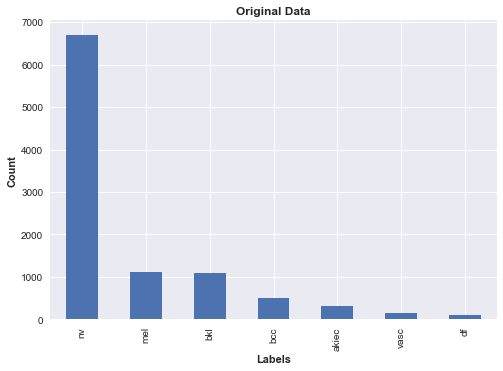

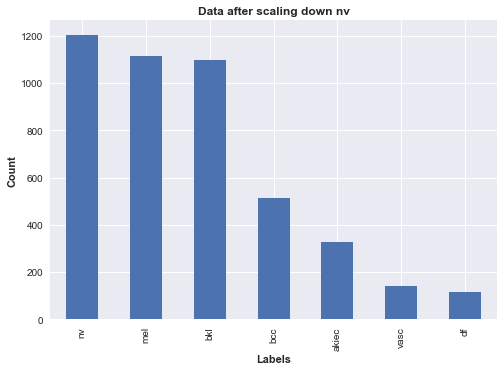

/Users/pandu/miniconda3/envs/mlproj/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/pandu/miniconda3/envs/mlproj/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classification Report
              precision    recall  f1-score   support

         bkl       0.34      0.19      0.24        74
          nv       0.30      0.17      0.22       100
          df       0.51      0.54      0.53       229
         mel       0.70      0.42      0.53        33
        vasc       0.43      0.70      0.54       215
         bcc       0.89      0.71      0.79       223
       akiec       0.55      0.38      0.45        29

    accuracy                           0.54       903
   macro avg       0.53      0.44      0.47       903
weighted avg       0.56      0.54      0.53       903

Accuracy 0.5415282392026578 



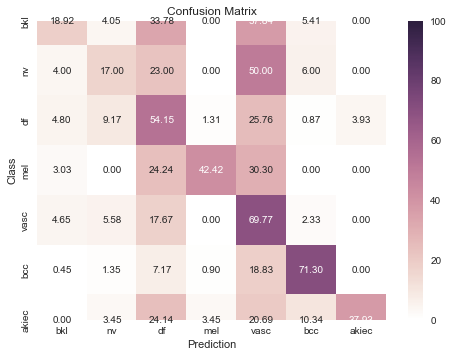

In [26]:
#################
# Edit params here for RFC

size_of_test_data = 0.2
random_seed = 42
remove_labels = False
scale_down_NV = True

#################
    
    
labels, conf_matrix = randomforest(metadata, size_of_test_data, random_seed, remove_labels, scale_down_NV)
plot_conf_matrix(conf_matrix, labels, '../Figures/confusion_matrix_rfc.png')

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sn
# import pandas as pd
# import seaborn as sns
# import math
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import matplotlib as mpl
 
# mpl.style.use('seaborn')
 
# conf_arr = confusion_matrix(y_test, ypred)
 
# s = conf_arr.sum(axis = 1)
 
# conf_arr = (conf_arr * 100.0) / s[:,None]
 
# conf_arr = np.nan_to_num(conf_arr)
 
# names = metadata['dx'].unique()
# df_cm = pd.DataFrame(conf_arr, index = names, columns = names)
 
# fig = plt.figure()
 
# plt.clf()
 
# ax = fig.add_subplot(111)
# ax.set_aspect(1)
 
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
 
# res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
 
# # res.invert_yaxis()
 
# plt.yticks(np.arange(len(names)) + .5, names,va='center')
 
# plt.title('Percent Classified')
# plt.xlabel("Prediction")
# plt.ylabel("Class")
 
# plt.savefig('confusion_matrix_rfc.png', dpi=100, bbox_inches='tight' )
# plt.show()
# plt.close()

(8012, 2375)
(8012,)


/Users/pandu/miniconda3/envs/mlproj/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classification Report
              precision    recall  f1-score   support

         bkl       0.38      0.22      0.28        69
          nv       0.32      0.32      0.32        93
          df       0.42      0.31      0.36       228
         mel       0.00      0.00      0.00        28
        vasc       0.34      0.21      0.26       226
         bcc       0.79      0.92      0.85      1338
       akiec       0.00      0.00      0.00        21

    accuracy                           0.70      2003
   macro avg       0.32      0.28      0.30      2003
weighted avg       0.64      0.70      0.66      2003

Accuracy 0.6969545681477783 



/Users/pandu/miniconda3/envs/mlproj/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


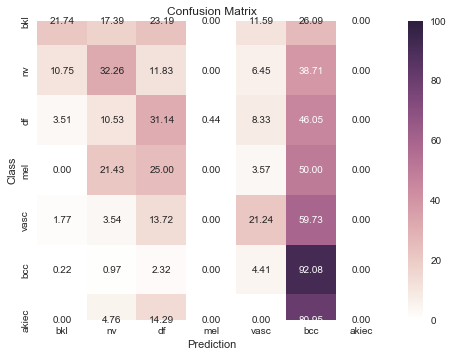

In [27]:
def rfc2(data, labels):
    from sklearn.ensemble import RandomForestClassifier as RFC 
    from sklearn.model_selection import train_test_split
    
    data = data.fillna(0)
    
    train_features, test_features, train_label, test_label = train_test_split(data, metadata['dx'], test_size=0.2, random_state=42)
    rfc = RFC()
    print(train_features.shape)
    print(train_label.shape)
    rfc.fit(train_features, train_label)
    label_pred = rfc.predict(test_features)

    # Plot the confusion matrix, store classification report, and store pred/true labels
    conf_matrix = stat_graphs(test_label, label_pred, labels['dx'].unique())
    return labels['dx'].unique(), conf_matrix
                                                                              
labels2, conf_mat = rfc2(X, metadata)
plot_conf_matrix(conf_mat, labels2, '../Figures/confusion_matrix_rfc2.png')